In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv('AAPL_historical_data.csv', index_col='Date', parse_dates=True)

In [8]:
# Display the first few rows
print("--- First 5 Rows ---")
print(df.head())

# Get a concise summary of the DataFrame
print("\n--- DataFrame Info ---")
df.info()

# Get descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- First 5 Rows ---
            Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL
Date                                                                
2020-01-02   72.620857  72.681304  71.373233  71.627107    135480400
2020-01-03   71.914818  72.676447  71.689957  71.847118    146322800
2020-01-06   72.487839  72.526526  70.783241  71.034702    118387200
2020-01-07   72.146950  72.753831  71.926922  72.497537    108872000
2020-01-08   73.307518  73.609752  71.849540  71.849540    132079200

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_AAPL   1257 non-null   float64
 1   High_AAPL    1257 non-null   float64
 2   Low_AAPL     1257 non-null   float64
 3   Open_AAPL    1257 non-null   float64
 4   Volume_AAPL  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB

--

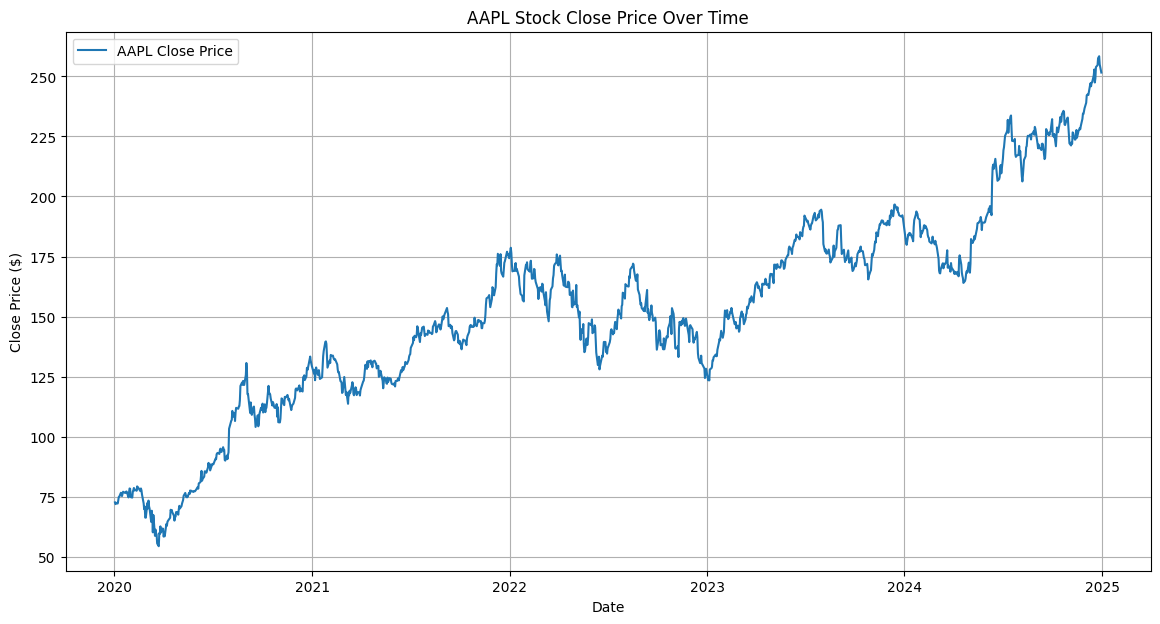

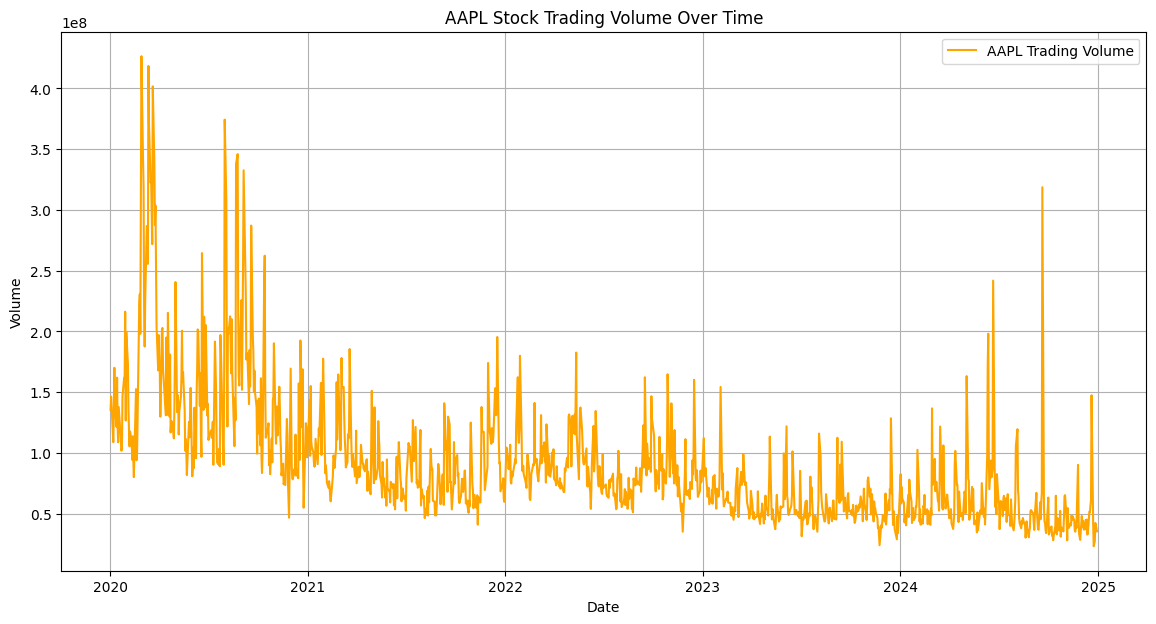

In [10]:
# Plotting the Close Price over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close_AAPL'], label='AAPL Close Price')
plt.title('AAPL Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the Volume over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume_AAPL'], label='AAPL Trading Volume', color='orange')
plt.title('AAPL Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Create the target variable (Simplest Classification: Future Price Direction)
# 1 if next day's close price is higher than current day's close, 0 otherwise.
df['Target'] = (df['Close_AAPL'].shift(-1) > df['Close_AAPL']).astype(int)

# Create simple features
# 1. Previous day's close price
df['Prev_Close'] = df['Close_AAPL'].shift(1)

# 2. Simple Moving Average (SMA_10) - 10-day moving average
df['SMA_10'] = df['Close_AAPL'].rolling(window=10).mean()

# (Optional) Add another simple feature: Daily Returns
df['Daily_Return'] = df['Close_AAPL'].pct_change() * 100 # Percentage change

# Drop rows with NaN values generated by shift() and rolling()
# For 'Target', the last row will be NaN.
# For 'Prev_Close', the first row will be NaN.
# For 'SMA_10', the first (window-1) rows will be NaN (i.e., first 9 rows for SMA_10).
# For 'Daily_Return', the first row will be NaN.
df_processed = df.dropna()

print("\n--- DataFrame after Feature Engineering and NaN Removal ---")
print(df_processed.head(15)) # Show more rows to see SMA_10 appearing
print("\n--- Info after Processing ---")
df_processed.info()


--- DataFrame after Feature Engineering and NaN Removal ---
            Close_AAPL  High_AAPL   Low_AAPL  Open_AAPL  Volume_AAPL  Target  \
Date                                                                           
2020-01-15   75.278091  76.283928  74.845290  75.401405    121923600       1   
2020-01-16   76.221062  76.332289  75.459433  75.822114    108829200       1   
2020-01-17   77.064888  77.067301  76.163018  76.470086    137816400       0   
2020-01-21   76.542625  77.135000  76.404805  76.692532    110843200       1   
2020-01-22   76.815857  77.369545  76.721556  77.028624    101832400       1   
2020-01-23   77.185799  77.265585  76.320196  76.869058    104472000       0   
2020-01-24   76.963341  78.177111  76.772327  77.432409    146537600       0   
2020-01-27   74.700233  75.382068  73.716157  74.968614    161940000       1   
2020-01-28   76.813438  76.985105  75.483608  75.582741    162234000       1   
2020-01-29   78.421326  79.270002  77.705637  78.447926    

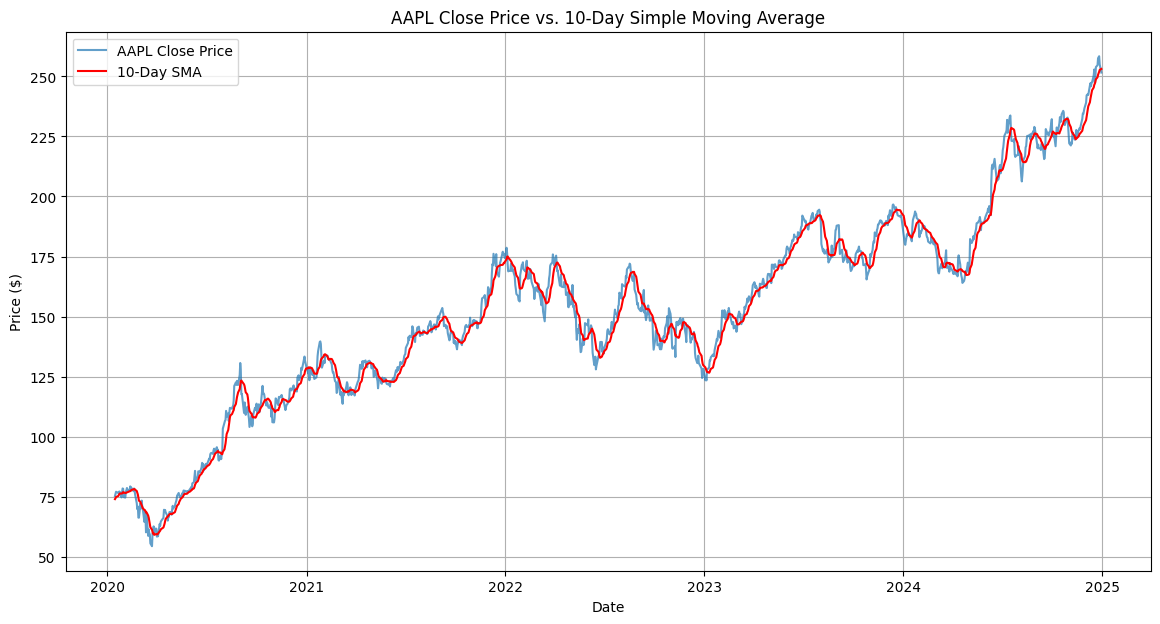

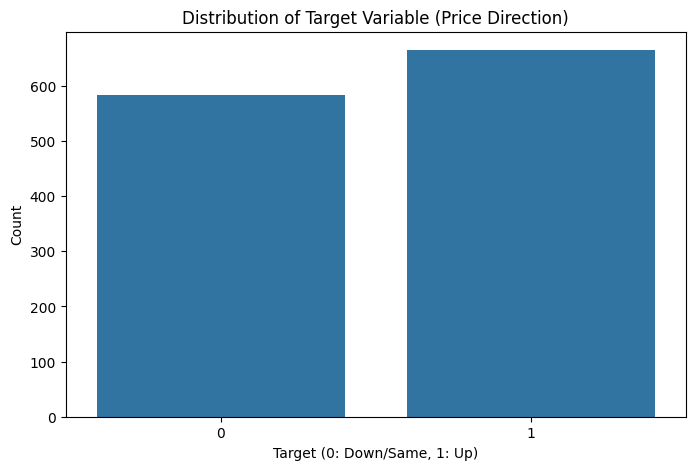

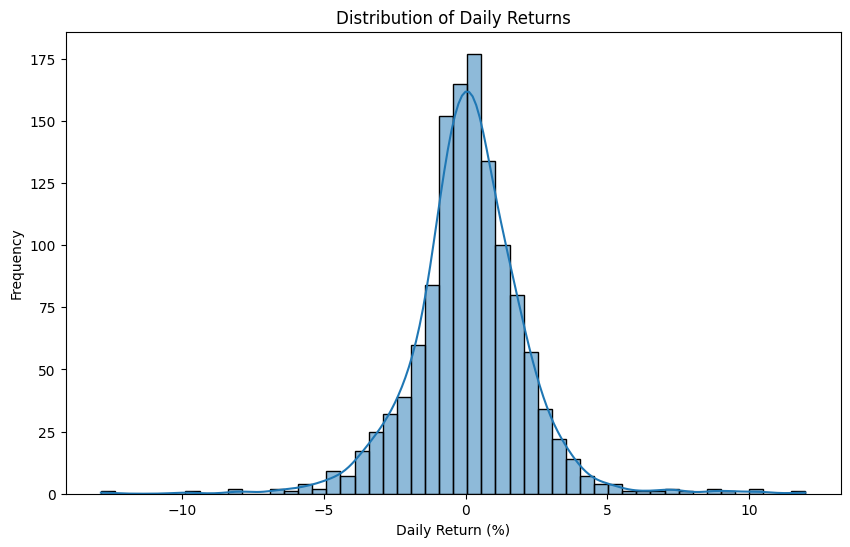


--- Correlation Matrix ---
              Close_AAPL  Prev_Close    SMA_10  Daily_Return    Target
Close_AAPL      1.000000    0.997941  0.994594      0.016729  0.006542
Prev_Close      0.997941    1.000000  0.996078     -0.043627  0.007348
SMA_10          0.994594    0.996078  1.000000     -0.033858  0.008562
Daily_Return    0.016729   -0.043627 -0.033858      1.000000 -0.045672
Target          0.006542    0.007348  0.008562     -0.045672  1.000000


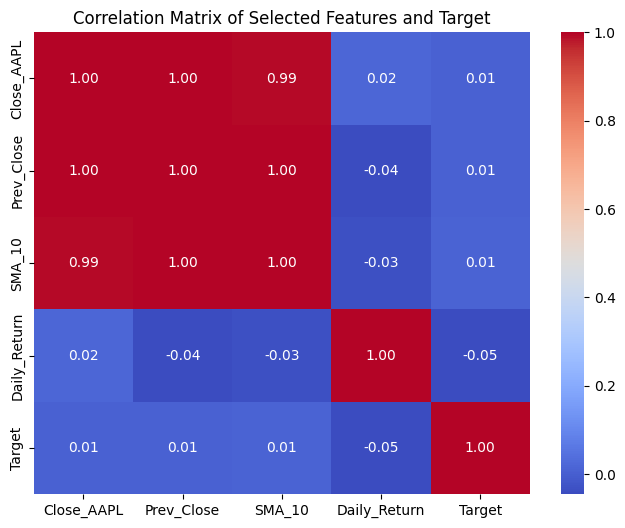

In [15]:
# Plotting the SMA_10 against Close Price
plt.figure(figsize=(14, 7))
plt.plot(df_processed.index, df_processed['Close_AAPL'], label='AAPL Close Price', alpha=0.7)
plt.plot(df_processed.index, df_processed['SMA_10'], label='10-Day SMA', color='red')
plt.title('AAPL Close Price vs. 10-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the distribution of the Target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=df_processed)
plt.title('Distribution of Target Variable (Price Direction)')
plt.xlabel('Target (0: Down/Same, 1: Up)')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of Daily Returns
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['Daily_Return'], bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix (to see relationships between features and target)
# Exclude 'Open', 'High', 'Low', 'Adj Close', 'Volume' for now to focus on new features and target
correlation_matrix = df_processed[['Close_AAPL', 'Prev_Close', 'SMA_10', 'Daily_Return', 'Target']].corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features and Target')
plt.show()

Explanation:

SMA Plot: This helps you see how the moving average smooths out price fluctuations and its relationship to the actual price. It's a common technical indicator.

Target Distribution: Shows if your target variable (up/down) is balanced. If one class is heavily dominant, it might require special handling during model training (e.g., oversampling, undersampling, or using imbalanced learning metrics).

Daily Returns Distribution: Provides insight into the volatility and typical magnitude of daily price movements. Financial returns often have a "fat-tailed" distribution.

Correlation Matrix: This is very important. It quantifies the linear relationship between your variables.

Look at the Target row/column: how strongly correlated are your features (Prev_Close, SMA_10, Daily_Return) with the Target? A higher absolute value indicates a stronger linear relationship.

Also, check for strong correlations between your features. Highly correlated features (multicollinearity) can sometimes cause issues for certain models, though for initial exploration, it's just good to be aware.